In [6]:
# !pip install pandas numpy matplotlib seaborn scikit-learn

In [1]:
import pandas as pd

In [2]:
train_data = pd.read_csv('../train_v9rqX0R.csv')

In [3]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
train_data.shape

(8523, 12)

In [6]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


* from describe we can see that there is no outliers in any of the numerical columns.

In [25]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [19]:
train_data["Item_Identifier"].value_counts()

FDW13    10
FDG33    10
FDP25     9
FDW49     9
NCF42     9
         ..
FDN52     1
FDC23     1
FDT35     1
FDE52     1
FDK57     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [20]:
train_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [12]:
train_data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [21]:
train_data['Outlet_Identifier'].value_counts() 

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

* Identified that there are some inconsistencies in the 'Item_Fat_Content' column like 'LF', 'low fat', 'Low Fat' all representing the same category. Similarly, 'reg' and 'Regular' represent the same category.
* Remaining columns doesn't have any inconsistencies..

In [22]:
train_data['Outlet_Size'].value_counts() 

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [23]:
train_data['Outlet_Location_Type'].value_counts() 

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [24]:
train_data['Outlet_Type'].value_counts() 


Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [9]:
train_data.duplicated().sum()

0

In [28]:
# Before cleaning, re-check unique values
print(train_data['Item_Fat_Content'].unique())
# Identify misspellings or alternate forms manually
# For example, to standardize:
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].replace({
    'LF': 'Low Fat',
    'low fat': 'Low Fat',
    'reg': 'Regular'
})
# After cleaning, re-check unique values
print(train_data['Item_Fat_Content'].unique())

['Low Fat' 'Regular']


In [29]:
# Assume df is your dataframe
# Create a mapping from each Item_Identifier to its average (non-null) Item_Weight
item_weight_map = train_data.groupby('Item_Identifier')['Item_Weight'].transform('mean')

In [46]:
df = train_data[(train_data["Item_Identifier"] == "FDA15") | (train_data["Item_Identifier"] == "DRC01")][["Item_Identifier","Item_Weight"]]

In [47]:
df

,Item_Identifier,Item_Weight
0,FDA15,9.30
1,DRC01,5.92
831,FDA15,9.30
2272,DRC01,5.92
2599,FDA15,9.30
2643,FDA15,9.30
2927,DRC01,NaN
4874,FDA15,9.30
5029,DRC01,5.92
5077,DRC01,5.92


In [48]:
# Replace missing Item_Weight values with mean weight per Item_Identifier
df['Item_Weight'] = df['Item_Weight'].fillna(
    df.groupby('Item_Identifier')['Item_Weight'].transform('mean')
)

In [49]:
df

,Item_Identifier,Item_Weight
0,FDA15,9.30
1,DRC01,5.92
831,FDA15,9.30
2272,DRC01,5.92
2599,FDA15,9.30
2643,FDA15,9.30
2927,DRC01,5.92
4874,FDA15,9.30
5029,DRC01,5.92
5077,DRC01,5.92


In [42]:
pd.set_option('display.max_rows', 50)

In [43]:
train_data[["Item_Identifier","Item_Weight"]]


,Item_Identifier,Item_Weight
0,FDA15,9.300
1,DRC01,5.920
2,FDN15,17.500
3,FDX07,19.200
4,NCD19,8.930
...,...,...
8518,FDF22,6.865
8519,FDS36,8.380
8520,NCJ29,10.600
8521,FDN46,7.210


In [30]:
item_weight_map

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [ ]:


# Fill missing Item_Weight values with the mapped (group) value
df['Item_Weight'] = df['Item_Weight'].fillna(item_weight_map)


In [50]:
# Replace missing Item_Weight values with mean weight per Item_Identifier
train_data['Item_Weight'] = train_data['Item_Weight'].fillna(
    train_data.groupby('Item_Identifier')['Item_Weight'].transform('mean')
)

In [52]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [58]:
import pandas as pd

data = {'col1': range(150), 'col2': [f'value_{i}' for i in range(150)]}
df = pd.DataFrame(data)

pd.set_option('display.max_rows', 40) # Set to None to display all rows

print(df)

     col1       col2
0       0    value_0
1       1    value_1
2       2    value_2
3       3    value_3
4       4    value_4
..    ...        ...
145   145  value_145
146   146  value_146
147   147  value_147
148   148  value_148
149   149  value_149

[150 rows x 2 columns]


In [60]:
train_data[["Outlet_Identifier","Outlet_Size","Outlet_Location_Type","Outlet_Type"]].head(30)

,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,OUT049,Medium,Tier 1,Supermarket Type1
1,OUT018,Medium,Tier 3,Supermarket Type2
2,OUT049,Medium,Tier 1,Supermarket Type1
3,OUT010,NaN,Tier 3,Grocery Store
4,OUT013,High,Tier 3,Supermarket Type1
5,OUT018,Medium,Tier 3,Supermarket Type2
6,OUT013,High,Tier 3,Supermarket Type1
7,OUT027,Medium,Tier 3,Supermarket Type3
8,OUT045,NaN,Tier 2,Supermarket Type1
9,OUT017,NaN,Tier 2,Supermarket Type1


In [55]:
train_data[train_data['Item_Identifier'] == "FDN52"]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564


In [62]:
# Replace missing Item_Weight values with mean weight per Item_Identifier
train_data['Outlet_Size'] = train_data['Outlet_Identifier'].fillna(
    train_data.groupby('Outlet_Identifier')['Outlet_Size'].transform('mode')
)

ValueError: 'mode' is not a valid function name for transform(name)

In [64]:
# Step 1: Fill using mode per Outlet_Identifier
train_data['Outlet_Size'] = train_data.groupby('Outlet_Identifier')['Outlet_Size']\
    .transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else pd.NA))

In [65]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
# Step 2: Fill remaining NaN using Outlet_Type + Outlet_Location_Type
train_data['Outlet_Size'] = train_data.groupby(['Outlet_Type','Outlet_Location_Type'])['Outlet_Size']\
    .transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else pd.NA))

In [69]:
train_data[train_data['Outlet_Size'].isnull()].head(30)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,<NA>,Tier 3,Grocery Store,732.3800
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,<NA>,Tier 3,Grocery Store,178.4344
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,<NA>,Tier 3,Grocery Store,163.7868
45,FDM39,6.420,Low Fat,0.089499,Dairy,178.1002,OUT010,1998,<NA>,Tier 3,Grocery Store,358.2004
65,FDC46,17.700,Low Fat,0.195068,Snack Foods,185.4266,OUT010,1998,<NA>,Tier 3,Grocery Store,184.4266
90,FDW20,20.750,Low Fat,0.040421,Fruits and Vegetables,122.1730,OUT010,1998,<NA>,Tier 3,Grocery Store,369.5190
122,FDB14,20.250,Regular,0.171939,Canned,92.5120,OUT010,1998,<NA>,Tier 3,Grocery Store,186.4240
133,FDS52,8.890,Low Fat,0.009163,Frozen Foods,101.7016,OUT010,1998,<NA>,Tier 3,Grocery Store,101.2016
139,NCN07,18.500,Low Fat,0.056816,Others,132.1284,OUT010,1998,<NA>,Tier 3,Grocery Store,263.6568
174,FDI32,17.700,Low Fat,0.291865,Fruits and Vegetables,115.1834,OUT010,1998,<NA>,Tier 3,Grocery Store,345.5502


In [70]:
train_data.loc[(train_data['Outlet_Size'].isna()) & 
               (train_data['Outlet_Type'] == 'Grocery Store'), 'Outlet_Size'] = 'Small'

In [71]:
train_data.isnull().sum()

Item_Identifier              0
Item_Weight                  4
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [72]:
train_data.shape

(8523, 12)

In [73]:
train_data.dropna( inplace=True)


In [74]:
train_data.shape

(8519, 12)

In [75]:
# Unique value counts per column
for col in train_data.columns:
    print(f"{col}: {train_data[col].nunique()} unique values")

Item_Identifier: 1555 unique values
Item_Weight: 497 unique values
Item_Fat_Content: 2 unique values
Item_Visibility: 7876 unique values
Item_Type: 16 unique values
Item_MRP: 5936 unique values
Outlet_Identifier: 10 unique values
Outlet_Establishment_Year: 9 unique values
Outlet_Size: 3 unique values
Outlet_Location_Type: 3 unique values
Outlet_Type: 4 unique values
Item_Outlet_Sales: 3493 unique values


In [76]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8519 non-null   object 
 3   Item_Visibility            8519 non-null   float64
 4   Item_Type                  8519 non-null   object 
 5   Item_MRP                   8519 non-null   float64
 6   Outlet_Identifier          8519 non-null   object 
 7   Outlet_Establishment_Year  8519 non-null   int64  
 8   Outlet_Size                8519 non-null   object 
 9   Outlet_Location_Type       8519 non-null   object 
 10  Outlet_Type                8519 non-null   object 
 11  Item_Outlet_Sales          8519 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.2+ KB


In [ ]:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):

dtypes: float64(4), int64(1), object(7)
memory usage: 865.2+ KB

## EDA

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
df = train_data.copy()

In [78]:
categorical_cols = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())



Value counts for Item_Identifier:
FDW13    10
FDG33    10
NCL31     9
NCB18     9
FDW26     9
         ..
FDC23     1
DRF48     1
FDO33     1
FDT35     1
FDY43     1
Name: Item_Identifier, Length: 1555, dtype: int64

Value counts for Item_Fat_Content:
Low Fat    5516
Regular    3003
Name: Item_Fat_Content, dtype: int64

Value counts for Item_Type:
Fruits and Vegetables    1232
Snack Foods              1199
Household                 910
Frozen Foods              855
Dairy                     681
Canned                    649
Baking Goods              647
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Value counts for Outlet_Identifier:
OUT027    932
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT0

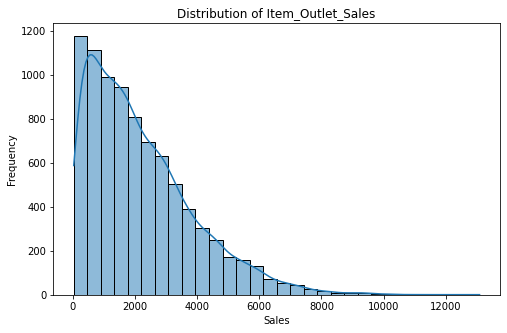

In [81]:
plt.figure(figsize=(8,5))
sns.histplot(df['Item_Outlet_Sales'], bins=30, kde=True)
plt.title('Distribution of Item_Outlet_Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

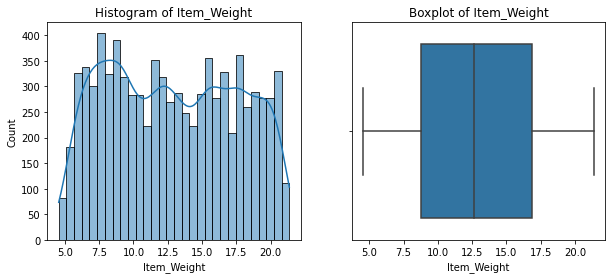

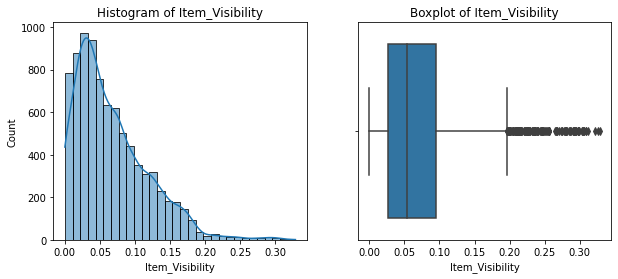

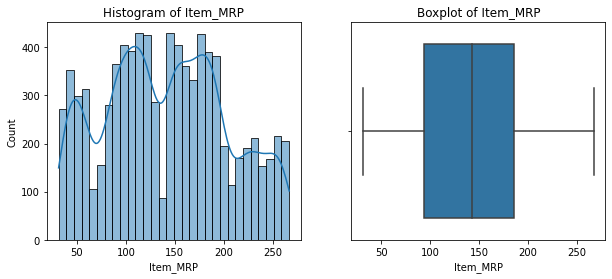

In [82]:
numeric_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP']

for col in numeric_cols:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')

    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [83]:
# Add 1e-6 to avoid log(0)
# df['Item_Visibility_log'] = np.log1p(df['Item_Visibility'])

* A zero visibility indicator flag is a new feature created to identify whether a product’s Item_Visibility is exactly zero. It is set to 1 for rows where Item_Visibility equals zero, and 0 otherwise.

In [84]:
# df['Item_Visibility_zero_flag'] = (df['Item_Visibility'] == 0).astype(int)

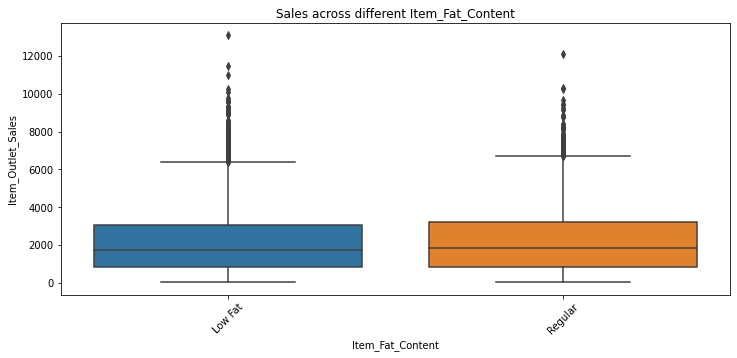

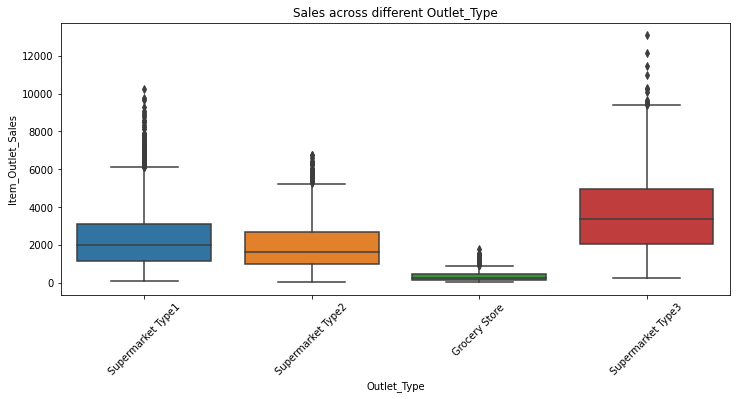

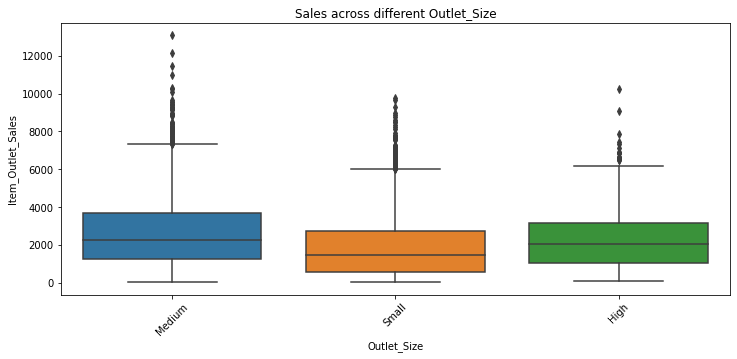

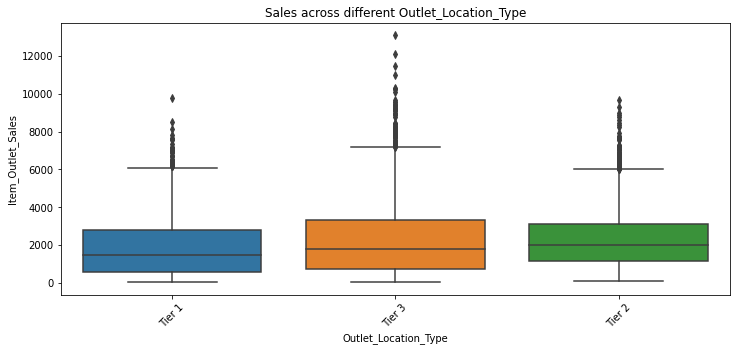

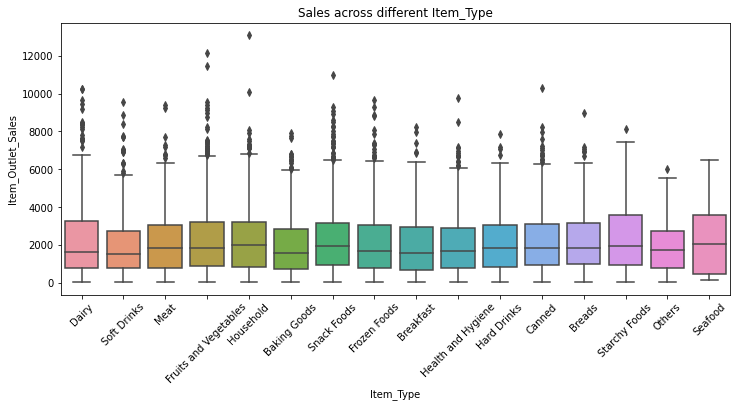

In [85]:
cat_vars_for_sales = ['Item_Fat_Content', 'Outlet_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Item_Type']

for col in cat_vars_for_sales:
    plt.figure(figsize=(12,5))
    sns.boxplot(x=df[col], y=df['Item_Outlet_Sales'])
    plt.title(f'Sales across different {col}')
    plt.xticks(rotation=45)
    plt.show()


* Outlet_Type and Item_Type are the most influential categorical features for sales prediction.
* Outlet_Size and Outlet_Location_Type also contribute, but to a lesser extent.
* Item_Fat_Content has minimal impact on sales.

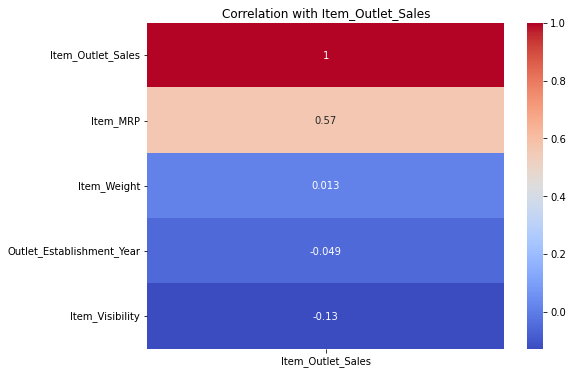

In [86]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr()[['Item_Outlet_Sales']].sort_values(by='Item_Outlet_Sales', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation with Item_Outlet_Sales')
plt.show()


* This plot highlights that Item_MRP is your most predictive numeric variable for sales, while other numeric features have little direct linear impact on the target, at least in this dataset and without feature transformations.

* Unexpected relationships: Weak or negative correlations (like for Item_Visibility) invite deeper analysis—perhaps through feature engineering, business investigation, or by examining non-linear or interaction effects.

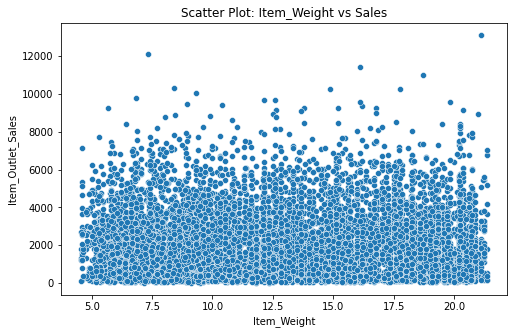

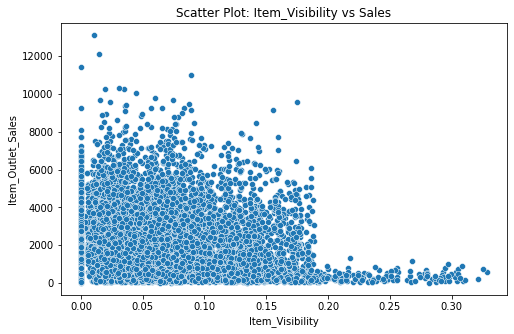

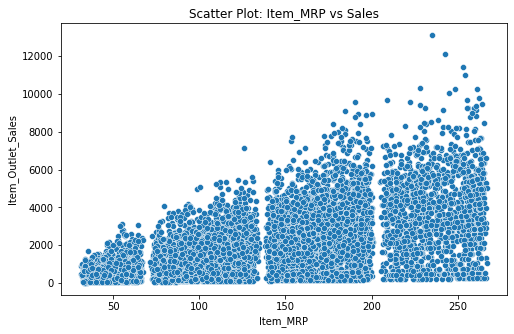

In [87]:
for col in ['Item_Weight', 'Item_Visibility', 'Item_MRP']:
    plt.figure(figsize=(8,5))
    sns.scatterplot(x=df[col], y=df['Item_Outlet_Sales'])
    plt.title(f'Scatter Plot: {col} vs Sales')
    plt.show()

* Item_MRP is positively and strongly related to sales—this feature is highly informative.

* Item_Visibility has a weak or unexpected relationship, with most sales and items at low visibility and little sales presence for high visibility, hinting at special business or data handling around this variable.

In [88]:
for col in cat_vars_for_sales:
    grouped_sales = df.groupby(col)['Item_Outlet_Sales'].mean().sort_values(ascending=False)
    print(f"\nMean sales by {col}:\n", grouped_sales)



Mean sales by Item_Fat_Content:
 Item_Fat_Content
Regular    2225.070565
Low Fat    2157.298823
Name: Item_Outlet_Sales, dtype: float64

Mean sales by Outlet_Type:
 Outlet_Type
Supermarket Type3    3695.781505
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Grocery Store         340.031198
Name: Item_Outlet_Sales, dtype: float64

Mean sales by Outlet_Size:
 Outlet_Size
Medium    2681.097134
High      2298.995256
Small     1867.546932
Name: Item_Outlet_Sales, dtype: float64

Mean sales by Outlet_Location_Type:
 Outlet_Location_Type
Tier 2    2323.990559
Tier 3    2278.845218
Tier 1    1877.644978
Name: Item_Outlet_Sales, dtype: float64

Mean sales by Item_Type:
 Item_Type
Starchy Foods            2374.332773
Seafood                  2326.065928
Fruits and Vegetables    2289.009592
Snack Foods              2275.522818
Household                2258.784300
Dairy                    2230.749701
Canned                   2225.194904
Breads                   2204.132226
Meat 

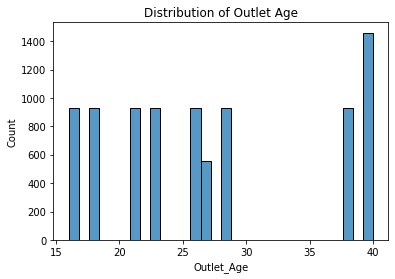

In [90]:
import datetime
current_year = datetime.datetime.now().year

# Create Outlet_Age feature
df['Outlet_Age'] = current_year - df['Outlet_Establishment_Year']

# Check distribution
sns.histplot(df['Outlet_Age'], bins=30)
plt.title('Distribution of Outlet Age')
plt.show()


## Data Preprocessing

In [93]:
df1 = df.copy()

In [94]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# df1['Item_Type'] = le.fit_transform(df1['Item_Type'])
df1['Item_Fat_Content'] = le.fit_transform(df1['Item_Fat_Content'])
df1['Item_Identifier'] = le.fit_transform(df1['Item_Identifier'])
df1['Outlet_Identifier'] = le.fit_transform(df1['Outlet_Identifier'])
df1['Outlet_Size'] = le.fit_transform(df1['Outlet_Size'])
df1["Outlet_Location_Type"] = le.fit_transform(df1["Outlet_Location_Type"])
df1["Outlet_Type"] = le.fit_transform(df1["Outlet_Type"])

In [95]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,26
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228,16
2,660,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,26
3,1117,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800,27
4,1293,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052,38


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1['Item_MRP'] = scaler.fit_transform(df1[['Item_MRP']])
df1['Item_Weight'] = scaler.fit_transform(df1[['Item_Weight']])



In [99]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_MRP_scaled
0,156,-0.769598,0,0.016047,4,1.746938,9,1999,1,0,1,3735.1380,26,1.746938
1,8,-1.497133,1,0.019278,14,-1.489096,3,2009,1,2,2,443.4228,16,-1.489096
2,660,0.995427,0,0.016760,10,0.009762,9,1999,1,0,1,2097.2700,26,0.009762
3,1117,1.361347,1,0.000000,6,0.659682,0,1998,2,2,0,732.3800,27,0.659682
4,1293,-0.849240,0,0.000000,9,-1.399305,1,1987,0,2,1,994.7052,38,-1.399305


# Modeling

In [100]:
df2 = df1.drop(columns=['Outlet_Establishment_Year','Item_MRP_scaled'])

In [ ]:
from sklearn.model_selection import train_test_split
X = df2.drop('Item_Outlet_Sales', axis=1)
y = df2['Item_Outlet_Sales']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8519, dtype: float64

In [104]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
preds = lr.predict(X_val)


In [105]:
from sklearn.metrics import mean_squared_error
import numpy as np
rmse = np.sqrt(mean_squared_error(y_val, preds))
print(f"RMSE: {rmse}")


RMSE: 1199.4742180241844


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_val)

rmse = np.sqrt(mean_squared_error(y_val, rf_preds))
print(f"RMSE: {rmse}")


In [107]:
rmse = np.sqrt(mean_squared_error(y_val, rf_preds))
print(f"RMSE: {rmse}")

RMSE: 1142.5036326184916


Validation RMSE: 1111.2783342529274


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

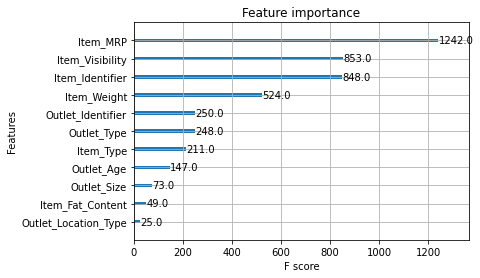

In [148]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np


# Initialize XGBoost regressor with default parameters
model = xgb.XGBRegressor(
    objective='reg:squarederror',  # Regression with squared loss
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    seed=42
)

# Train the model
model.fit(X_train, y_train)

# Predict on validation set
y_pred = model.predict(X_val)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"Validation RMSE: {rmse}")

# (Optional) Feature importance plot
xgb.plot_importance(model)


In [149]:
min(y_pred)

-32.92571

In [129]:
test_data = pd.read_csv('../test_AbJTz2l.csv')

In [130]:
# --- Preprocessing for test data ---

# 1. Standardize 'Item_Fat_Content'
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].replace({
    'LF': 'Low Fat',
    'low fat': 'Low Fat',
    'reg': 'Regular'
})

In [131]:
# 2. Fill missing Item_Weight with mean per Item_Identifier
test_data['Item_Weight'] = test_data['Item_Weight'].fillna(
    test_data.groupby('Item_Identifier')['Item_Weight'].transform('mean')
)

In [132]:
# 3. Fill missing Outlet_Size using mode per Outlet_Identifier, then Outlet_Type+Location
test_data['Outlet_Size'] = test_data.groupby('Outlet_Identifier')['Outlet_Size']\
    .transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else pd.NA))
test_data['Outlet_Size'] = test_data.groupby(['Outlet_Type','Outlet_Location_Type'])['Outlet_Size']\
    .transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else pd.NA))
test_data.loc[(test_data['Outlet_Size'].isna()) & 
              (test_data['Outlet_Type'] == 'Grocery Store'), 'Outlet_Size'] = 'Small'

In [133]:
# 4. Feature engineering: Outlet_Age
import datetime
current_year = datetime.datetime.now().year
test_data['Outlet_Age'] = current_year - test_data['Outlet_Establishment_Year']

In [134]:
# # 5. Encode categorical variables using the same LabelEncoders as train
# # (Assuming you have 'le' already fitted on train data for each column)
# test_data['Item_Fat_Content'] = le.fit_transform(test_data['Item_Fat_Content'])
# test_data['Item_Identifier'] = le.fit_transform(test_data['Item_Identifier'])
# test_data['Outlet_Identifier'] = le.fit_transform(test_data['Outlet_Identifier'])
# test_data['Outlet_Size'] = le.fit_transform(test_data['Outlet_Size'])
# test_data['Outlet_Location_Type'] = le.fit_transform(test_data['Outlet_Location_Type'])
# test_data['Outlet_Type'] = le.fit_transform(test_data['Outlet_Type'])
# test_data['Item_Type'] = le.fit_transform(test_data['Item_Type'])


from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder for each column
le_item = LabelEncoder()
le_outlet = LabelEncoder()
le_fat = LabelEncoder()
le_size = LabelEncoder()
le_loc = LabelEncoder()
le_type = LabelEncoder()
le_itype = LabelEncoder()

test_data['Item_Identifier'] = le_item.fit_transform(test_data['Item_Identifier'])
test_data['Outlet_Identifier'] = le_outlet.fit_transform(test_data['Outlet_Identifier'])
test_data['Item_Fat_Content'] = le_fat.fit_transform(test_data['Item_Fat_Content'])
test_data['Outlet_Size'] = le_size.fit_transform(test_data['Outlet_Size'])
test_data['Outlet_Location_Type'] = le_loc.fit_transform(test_data['Outlet_Location_Type'])
test_data['Outlet_Type'] = le_type.fit_transform(test_data['Outlet_Type'])
test_data['Item_Type'] = le_itype.fit_transform(test_data['Item_Type'])

In [135]:
# 6. Scale numerical features using the same scaler as train
test_data['Item_MRP'] = scaler.fit_transform(test_data[['Item_MRP']])
test_data['Item_Weight'] = scaler.fit_transform(test_data[['Item_Weight']])

# Now test_data is ready for prediction

In [136]:
test_data.drop("Outlet_Establishment_Year", axis=1, inplace=True)

In [137]:
test_data['Item_Outlet_Sales_Predicted'] = model.predict(test_data)

In [138]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age,Item_Outlet_Sales_Predicted
0,1103,1.733684,0,0.007565,13,-0.536555,9,1,0,1,26,1617.664673
1,1067,-0.939626,1,0.038428,4,-0.868937,2,2,1,1,18,1391.872925
2,1406,0.413134,0,0.099575,11,1.629848,0,2,2,0,27,820.398010
3,809,-1.151129,0,0.015388,13,0.226697,2,2,1,1,18,2508.385254
4,1184,0.198410,1,0.118599,4,1.508110,5,1,2,3,40,6500.715820


In [140]:
submission = test_data[['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales_Predicted']]
# Rename prediction column to match submission format
submission.rename(columns={'Item_Outlet_Sales_Predicted': 'Item_Outlet_Sales'}, inplace=True)

# Restore original string IDs for submission
submission['Item_Identifier'] = le_item.inverse_transform(submission['Item_Identifier'])
submission['Outlet_Identifier'] = le_outlet.inverse_transform(submission['Outlet_Identifier'])

submission = submission[['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales']]
# submission.to_csv('submission.csv', index=False)

c:\Users\narthu\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\frame.py:4438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-140-e38cf136068d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['Item_Identifier'] = le_item.inverse_transform(submission['Item_Identifier'])
<ipython-input-140-e38cf136068d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [141]:
submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1617.664673
1,FDW14,OUT017,1391.872925
2,NCN55,OUT010,820.398010
3,FDQ58,OUT017,2508.385254
4,FDY38,OUT027,6500.715820


In [143]:
# Save as CSV
submission.to_csv('bigmart_sales_predictions.csv', index=False)

In [147]:
submission[submission.Item_Outlet_Sales < 10]

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
4317,FDF09,OUT010,4.523578
5450,FDT36,OUT019,6.383744
